## Intro

The purpose of this project is to build a predictive model to classify whether a loan application will be approved or not based on the dataset provided by Kaggle, titled "Loan Approval Classification Data" (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data). 

Understanding the key factors influencing loan approval decisions is crucial for financial institutions to make informed and fair decisions. We will use a binomial regression model, such as logistic regression, to predict binary outcomes: approval (1) or rejection (0).

In [2]:
import pandas as pd

data = pd.read_csv('/Users/artemislu/Downloads/loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


The dataset contains 45,000 records and 14 variables, each described below:
| Column                          | Description                                                  | Type          |
|---------------------------------|--------------------------------------------------------------|---------------|
| person_age                      | Age of the person                                            | Float         |
| person_gender                   | Gender of the person (female, male)                          | Categorical   |
| person_education                | Highest education level (Master, High School, Bachelor, Associate, Doctorate) | Categorical   |
| person_income                   | Annual income                                               | Float         |
| person_emp_exp                  | Years of employment experience                              | Integer       |
| person_home_ownership           | Home ownership status (RENT, OWN, MORTGAGE, OTHER)           | Categorical   |
| loan_amnt                       | Loan amount requested                                        | Float         |
| loan_intent                     | Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION)   | Categorical   |
| loan_int_rate                   | Loan interest rate                                           | Float         |
| loan_percent_income             | Loan amount as a percentage of annual income                | Float         |
| cb_person_cred_hist_length      | Length of credit history in years                           | Float         |
| credit_score                    | Credit score of the person                                   | Integer       |
| previous_loan_defaults_on_file  | Indicator of previous loan defaults (No, Yes)                        | Categorical   |
| loan_status (target variable)   | Loan approval status: 1 = approved; 0 = rejected            | Integer       |

In [4]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Use a dictionary to store unique values for each column
unique_values = {column: data[column].unique() for column in categorical_columns}

# Print or access unique values
for column, values in unique_values.items():
    print(f"Unique values for {column}: {values}")

Unique values for person_gender: ['female' 'male']
Unique values for person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values for person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values for loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values for previous_loan_defaults_on_file: ['No' 'Yes']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

## EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

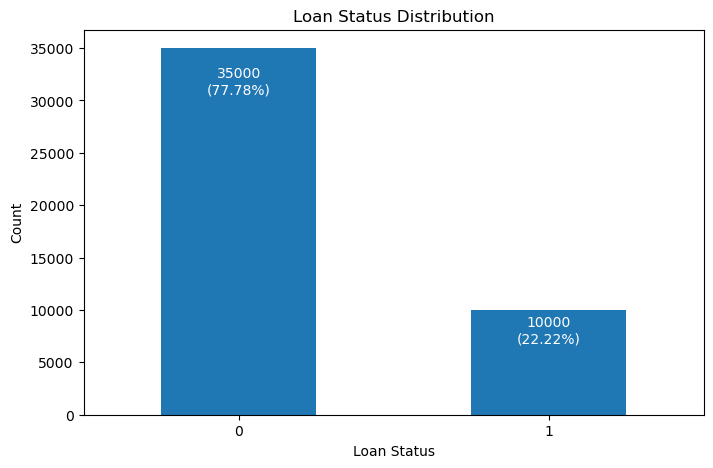

In [10]:
# Bar plot for loan_status - Target Variable
ax = data['loan_status'].value_counts().plot(kind='bar', title='Loan Status Distribution', figsize=(8, 5))
plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Annotate the bar plot with counts and percentages
total = len(data)  # Total number of rows in the dataset
for p in ax.patches:
    count = int(p.get_height())  # Height of the bar (count)
    percentage = f"{count / total * 100:.2f}%"  # Calculate percentage
    # Annotate text slightly below the top of the bar
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.05 * p.get_height()), 
                ha='center', va='top', fontsize=10, color='white')

plt.show()

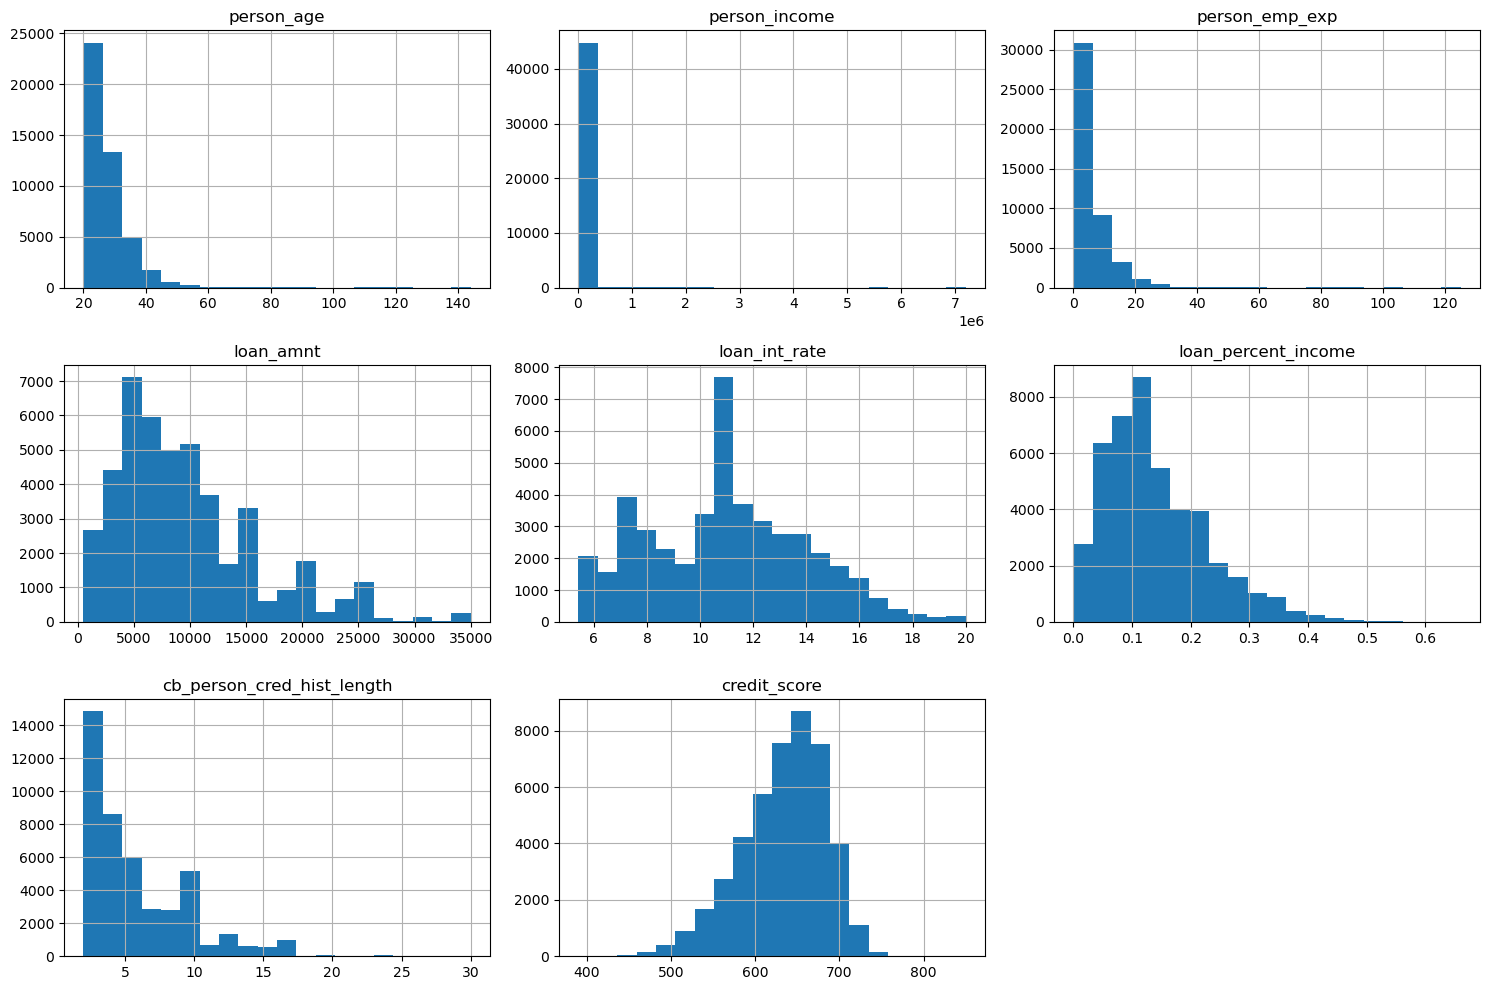

In [11]:
# Histograms for numerical columns
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

data[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

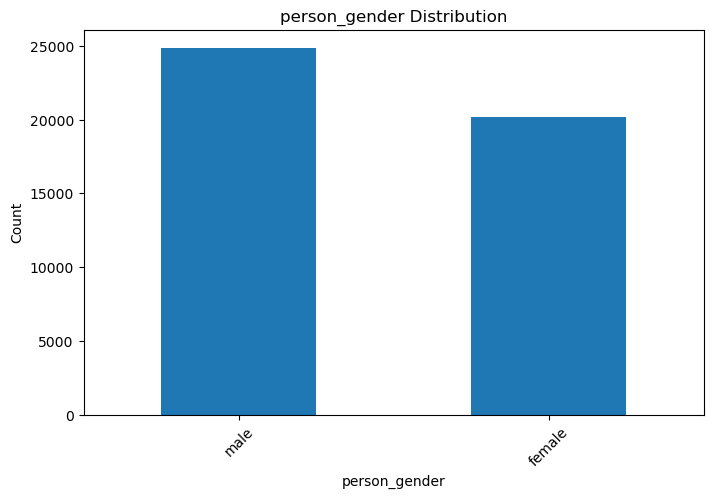

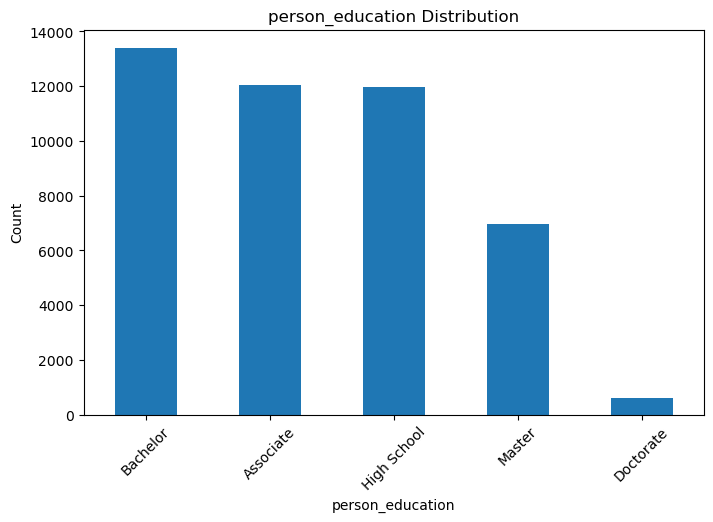

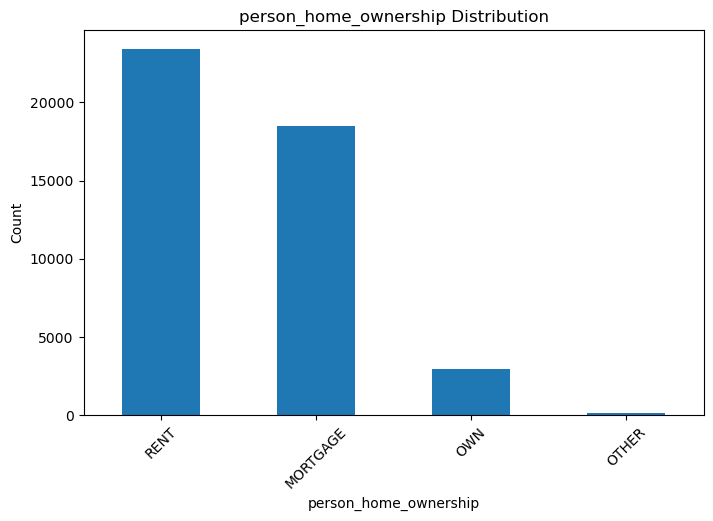

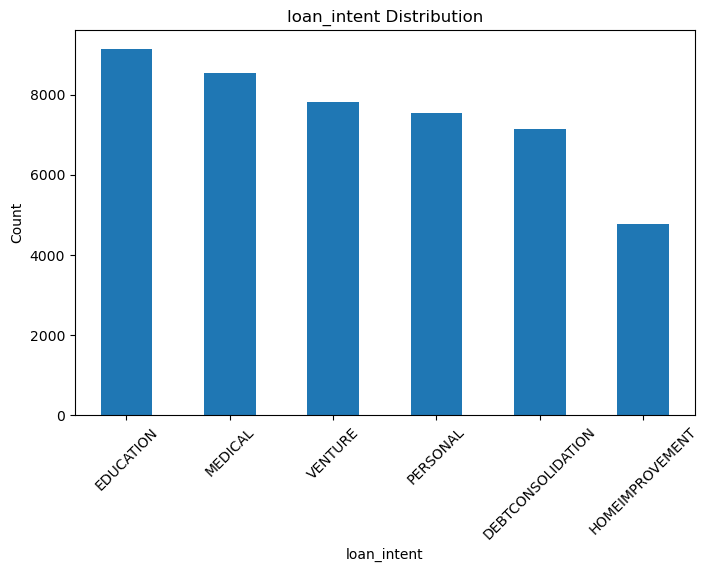

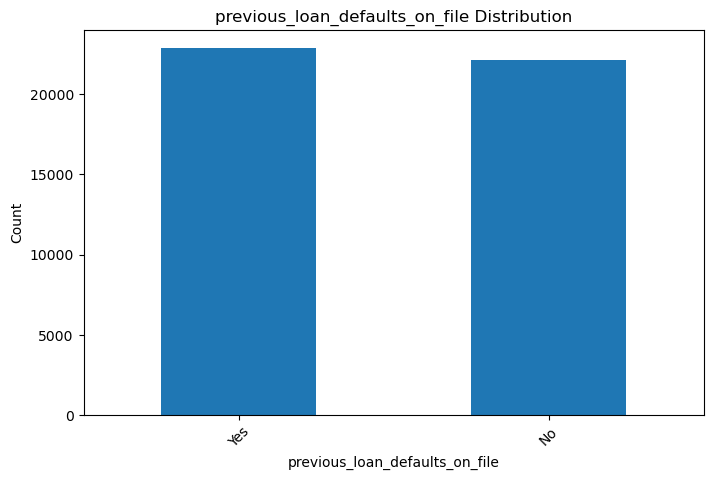

In [12]:
# Bar plots for categorical variables
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 
                       'loan_intent', 'previous_loan_defaults_on_file']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind='bar', title=f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

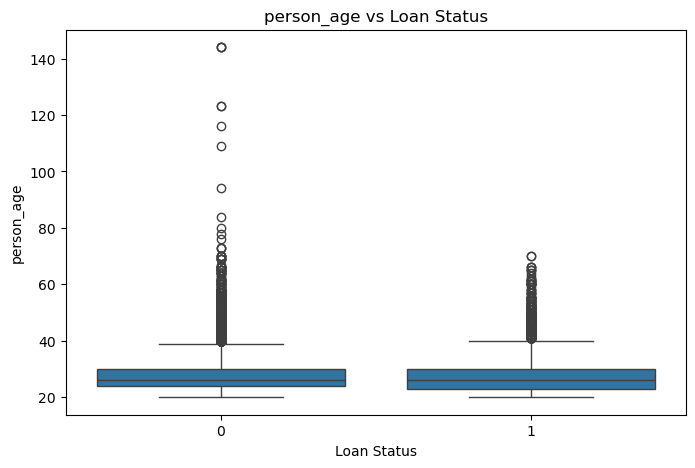

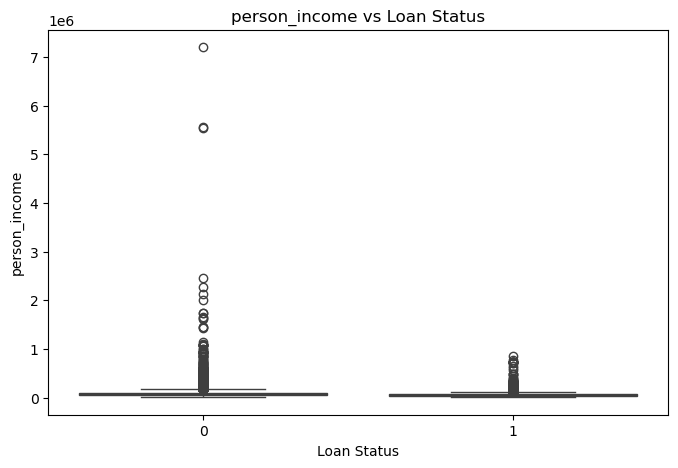

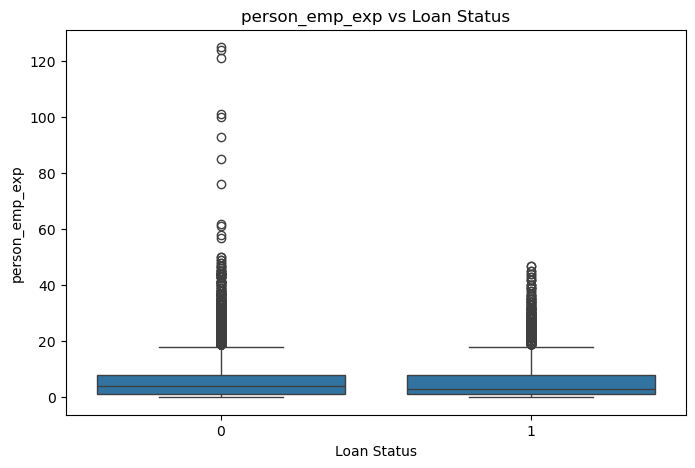

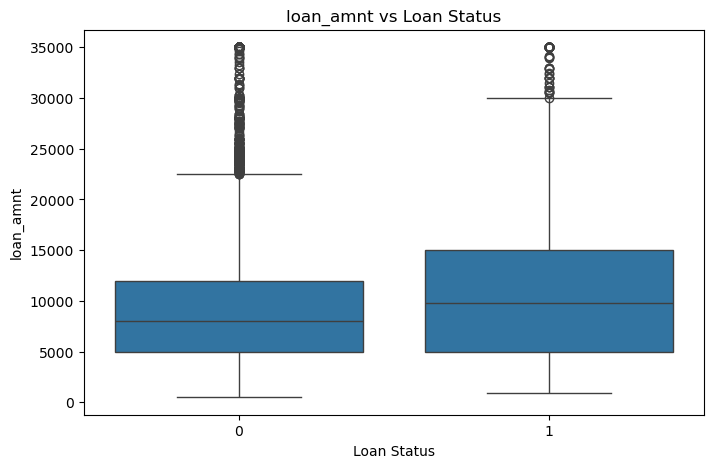

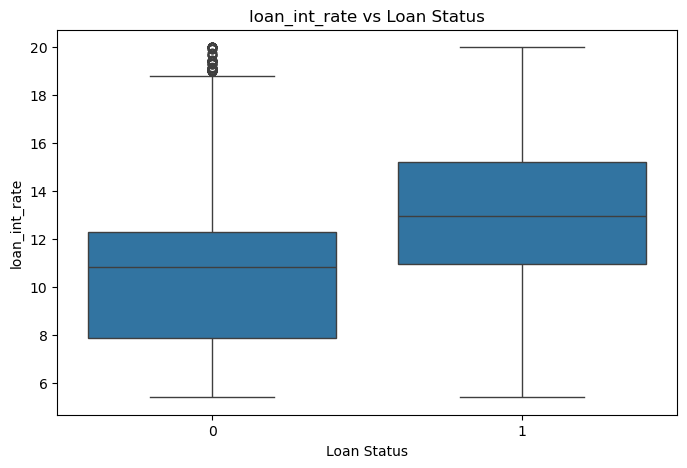

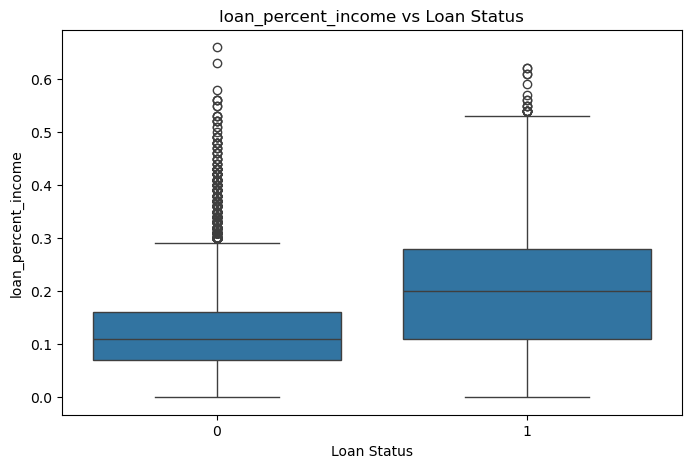

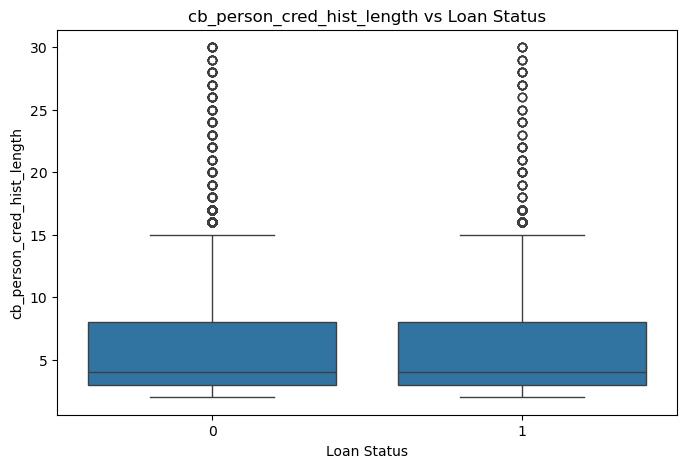

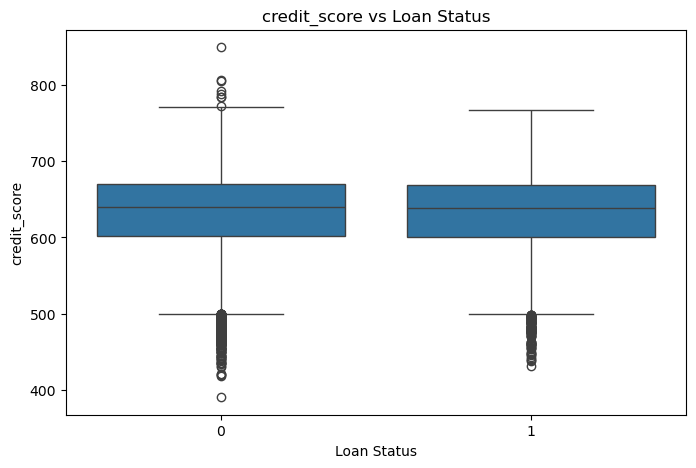

In [13]:
# Box Plots for Loan Status vs. Numerical Variables
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='loan_status', y=col)
    plt.title(f'{col} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)
    plt.show()

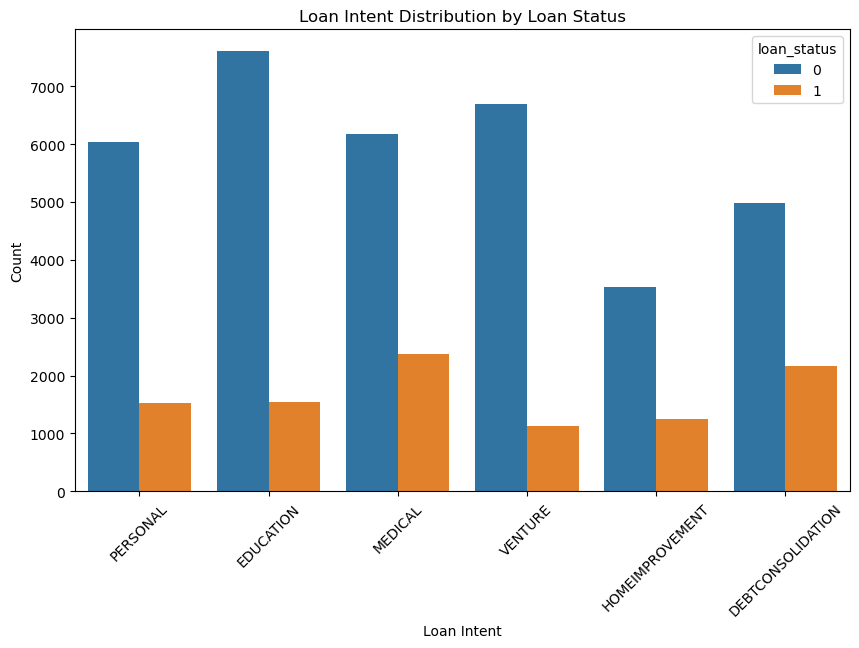

In [14]:
# Loan Intent Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='loan_intent', hue='loan_status')
plt.title('Loan Intent Distribution by Loan Status')
plt.xticks(rotation=45)
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

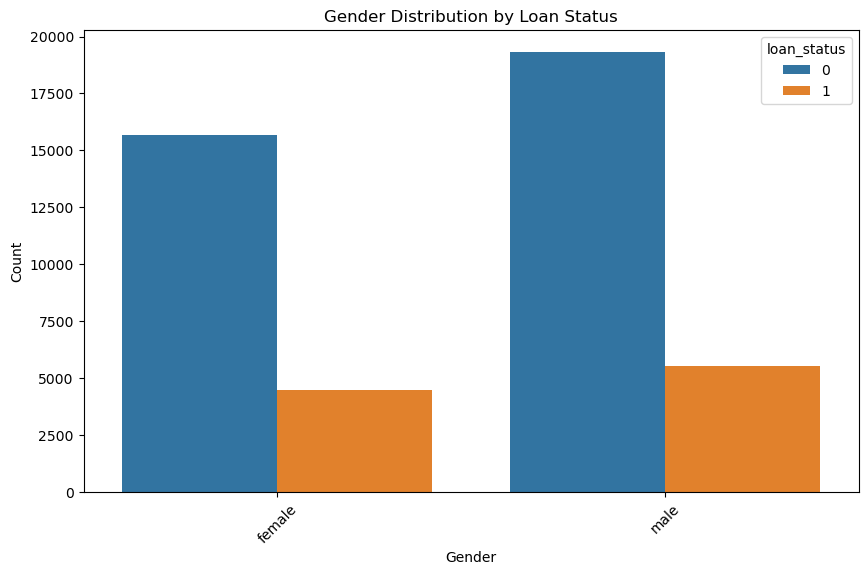

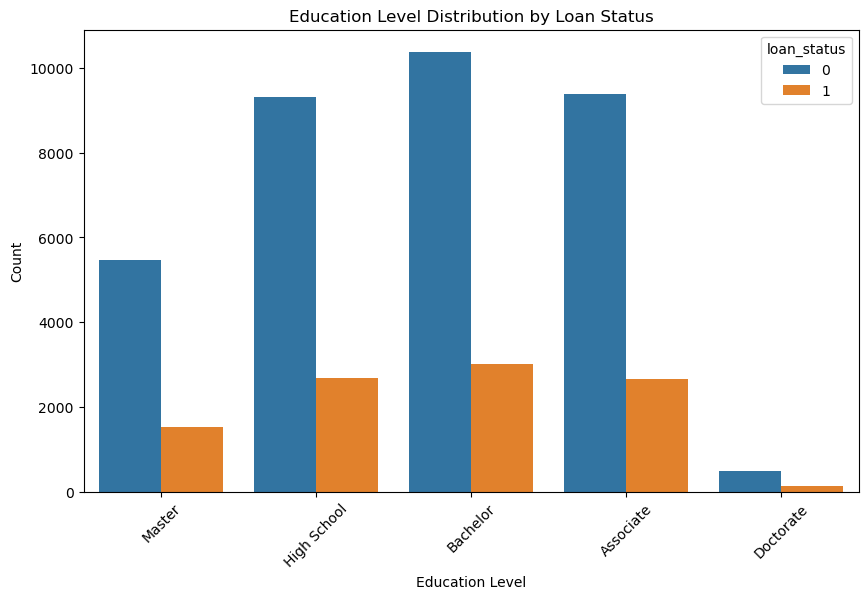

In [15]:
# Gender and Education Impact on Loan Approval
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='person_gender', hue='loan_status')
plt.title('Gender Distribution by Loan Status')
plt.xticks(rotation=45)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='person_education', hue='loan_status')
plt.title('Education Level Distribution by Loan Status')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

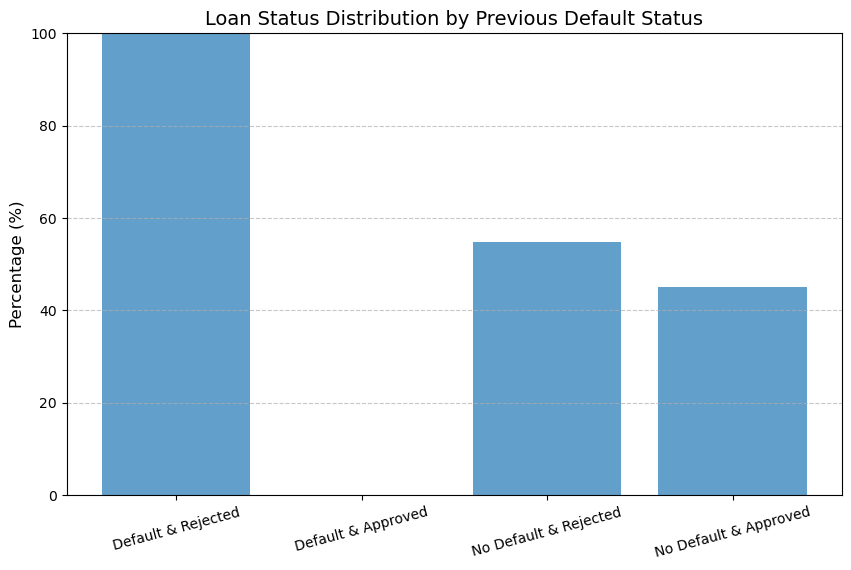

In [16]:
# Create a crosstab to compute counts
crosstab = pd.crosstab(data['previous_loan_defaults_on_file'], data['loan_status'], normalize='index') * 100

# Rename columns for clarity
crosstab.columns = ['Rejected', 'Approved']

# Separate percentages for easier plotting
percent_default_rejected = crosstab.loc['Yes', 'Rejected']
percent_default_approved = crosstab.loc['Yes', 'Approved']
percent_no_default_rejected = crosstab.loc['No', 'Rejected']
percent_no_default_approved = crosstab.loc['No', 'Approved']

# Create a bar plot
categories = ['Default & Rejected', 'Default & Approved', 'No Default & Rejected', 'No Default & Approved']
values = [percent_default_rejected, percent_default_approved, percent_no_default_rejected, percent_no_default_approved]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, alpha=0.7)
plt.title('Loan Status Distribution by Previous Default Status', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Data transformation

In [18]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True).astype(int)
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16,0,3,561,1,0,...,1,0,0,1,0,0,0,1,0,0
1,21,12282,0,1000,11,0,2,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25,12438,3,5500,12,0,3,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23,79753,0,35000,15,0,2,675,1,0,...,0,0,0,1,0,0,1,0,0,0
4,24,66135,1,35000,14,0,4,586,1,1,...,1,0,0,1,0,0,1,0,0,0


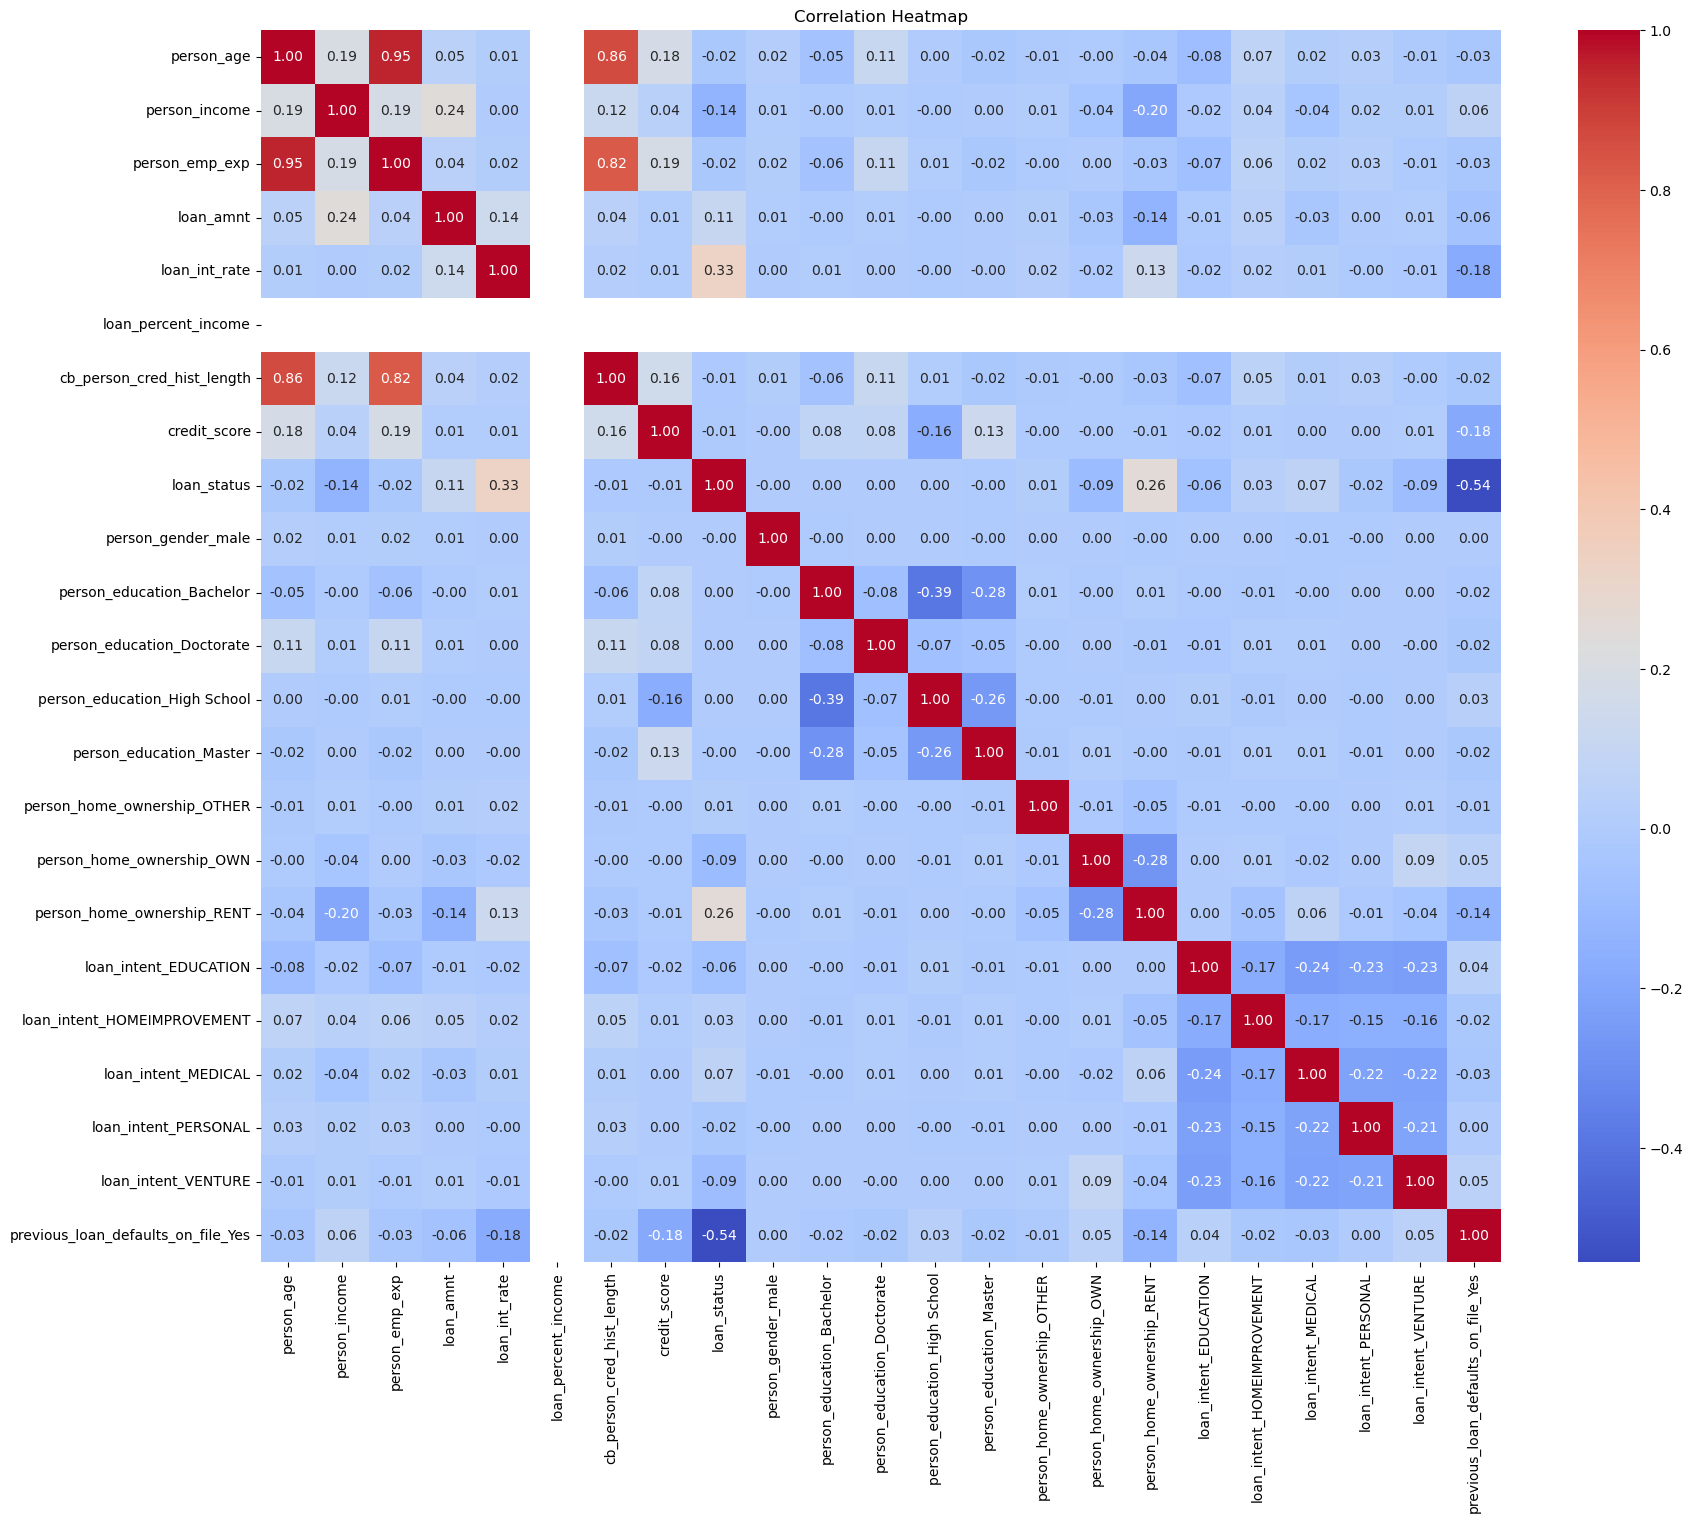

In [19]:
# Visualize correlations between numerical variables
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data processing

In [21]:
# Separate features and target
target_column = 'loan_status'  # Replace with the actual target column name
X = data.drop(columns=[target_column])
y = data[target_column]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [23]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [24]:
# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Output information
print(f"Training features shape: {X_train_processed.shape}")
print(f"Test features shape: {X_test_processed.shape}")


Training features shape: (36000, 27)
Test features shape: (9000, 27)


# Dimentionally Reduction

In [26]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=0.90)  # Retain 95% of the variance
X_train_reduced = pca.fit_transform(X_train_processed)
X_test_reduced = pca.transform(X_test_processed)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Number of Components Selected: {pca.n_components_}")
print(f"Explained Variance by Each Component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance)}")


print(f"Reduced Training Features Shape: {X_train_reduced.shape}")
print(f"Reduced Test Features Shape: {X_test_reduced.shape}")


Number of Components Selected: 13
Explained Variance by Each Component: [0.25854916 0.15056118 0.10347534 0.09002386 0.08538695 0.04447729
 0.04251796 0.03494547 0.02524566 0.02360276 0.02122187 0.01778828
 0.01707631]
Total Explained Variance: 0.9148720906326372
Reduced Training Features Shape: (36000, 13)
Reduced Test Features Shape: (9000, 13)


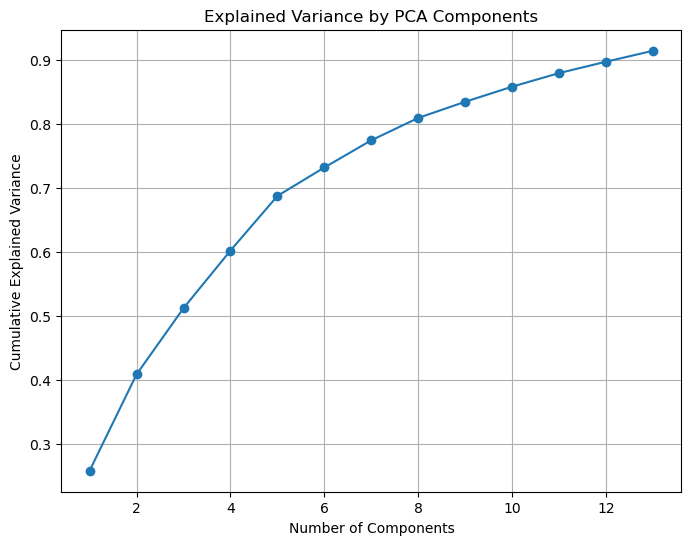

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


# Binomial regression models

### Model Selection:
#### Target: build a predictive model to classify whether a loan application will be approved or not
#### Reasons to Choose Binomial Regression:
##### 1.Binary Outcome: Binomial Regression is designed for binary(yes or no) classification tasks.
##### 2.Interpretability: It provides interpretable coefficients that explain the impact of each feature on the probability of approval.
##### 3.Efficiency: Binomial Regression is computationally efficient and works well even with relatively large datasets.
##### 4.Baseline Model: It serves as a strong baseline to compare with other models if needed.

In [30]:
import statsmodels.api as sm

# Add an intercept for the logistic regression model (statsmodels)
X_train_reduced_with_const = sm.add_constant(X_train_reduced)

# Fit the logistic regression model using statsmodels
logit_model = sm.GLM(y_train, X_train_reduced_with_const, family=sm.families.Binomial())
logit_results = logit_model.fit()

print("Statsmodels Logistic Regression Summary:")
print(logit_results.summary())

Statsmodels Logistic Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:                36000
Model:                            GLM   Df Residuals:                    35986
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8007.0
Date:                Tue, 10 Dec 2024   Deviance:                       16014.
Time:                        01:31:03   Pearson chi2:                 1.81e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4588
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [31]:
# Extract key performance metrics
log_likelihood = logit_results.llf  # Log-Likelihood
deviance = logit_results.deviance  # Deviance
aic = logit_results.aic  # Akaike Information Criterion
bic = logit_results.bic  # Bayesian Information Criterion


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [32]:
# Display metrics from statsmodels
print("\nModel Performance Metrics from Statsmodels:")
metrics_summary = {
    "Log-Likelihood": log_likelihood,
    "Deviance": deviance,
    "AIC (Akaike Information Criterion)": aic,
    "BIC (Bayesian Information Criterion)": bic
}
for metric, value in metrics_summary.items():
    print(f"{metric}: {value:.4f}")



Model Performance Metrics from Statsmodels:
Log-Likelihood: -8007.0388
Deviance: 16014.0776
AIC (Akaike Information Criterion): 16042.0776
BIC (Bayesian Information Criterion): -361524.9164


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Instantiate the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the reduced training dataset
logistic_model.fit(X_train_reduced, y_train)
# Predict on the reduced test dataset
y_pred = logistic_model.predict(X_test_reduced)
y_prob = logistic_model.predict_proba(X_test_reduced)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_report_text = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy of Binomial Regression Model:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report_text)
print("Confusion Matrix:\n", confusion)

Accuracy of Binomial Regression Model: 0.8928888888888888
ROC-AUC Score: 0.9516168086605599

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.74      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000

Confusion Matrix:
 [[6558  432]
 [ 532 1478]]


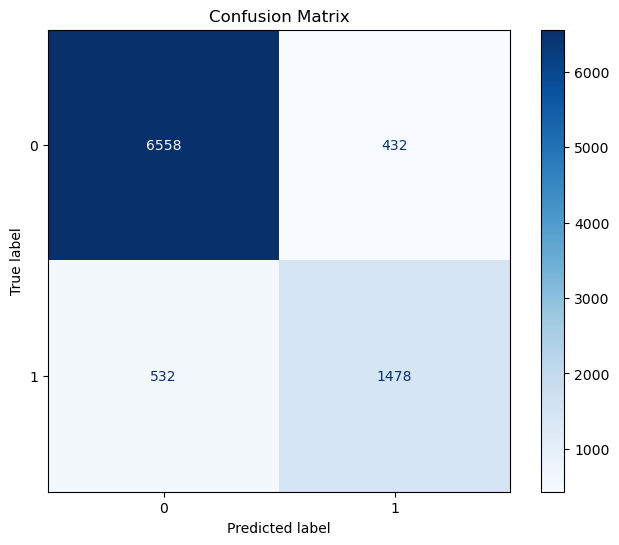

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Confusion matrix visualization
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=logistic_model.classes_).plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


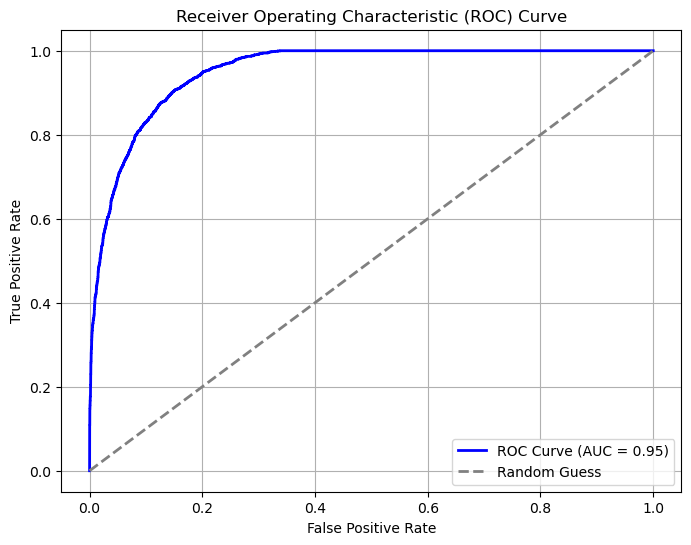

In [35]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [36]:
# Evaluate performance on training data
y_train_pred = logistic_model.predict(X_train_reduced)
y_train_prob = logistic_model.predict_proba(X_train_reduced)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_prob)
train_classification_report = classification_report(y_train, y_train_pred)

# Print training metrics
print("Training Data Performance:")
print("Accuracy:", train_accuracy)
print("ROC-AUC Score:", train_roc_auc)
print("Classification Report:\n", train_classification_report)

# Already computed test performance
print("\nTest Data Performance:")
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_report_text)


Training Data Performance:
Accuracy: 0.8948888888888888
ROC-AUC Score: 0.9533251712802374
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     28010
           1       0.77      0.74      0.76      7990

    accuracy                           0.89     36000
   macro avg       0.85      0.84      0.85     36000
weighted avg       0.89      0.89      0.89     36000


Test Data Performance:
Accuracy: 0.8928888888888888
ROC-AUC Score: 0.9516168086605599
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.74      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



In [37]:
# Model All

predictors = df_encoded.drop(columns = 'loan_status')
predictors = df_encoded.drop(columns = 'loan_status')
predictors = sm.add_constant(predictors)

predictors = df_encoded.drop(columns = 'loan_status')
model = sm.GLM(
    data['loan_status'],
    predictors,
    family=sm.families.Binomial()
)

result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:                45000
Model:                            GLM   Df Residuals:                    44979
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10904.
Date:                Tue, 10 Dec 2024   Deviance:                       21808.
Time:                        01:31:04   Pearson chi2:                 4.08e+07
No. Iterations:                    29   Pseudo R-squ. (CS):             0.4372
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
pers

In [38]:
# Extract key performance metrics
log_likelihood_all = result.llf  # Log-Likelihood
deviance_all = result.deviance  # Deviance
aic_all = result.aic  # Akaike Information Criterion
bic_all = result.bic  # Bayesian Information Criterion
# Display metrics from statsmodels
print("\nModel_All Performance Metrics from Statsmodels:")
metrics_summary = {
    "Model All Log-Likelihood": log_likelihood_all,
    "Model All Deviance": deviance_all,
    "Model All AIC (Akaike Information Criterion)": aic_all,
    "Model All BIC (Bayesian Information Criterion)": bic_all
}
for metric, value in metrics_summary.items():
    print(f"{metric}: {value:.4f}")


Model_All Performance Metrics from Statsmodels:
Model All Log-Likelihood: -10904.1406
Model All Deviance: 21808.2813
Model All AIC (Akaike Information Criterion): 21850.2813
Model All BIC (Bayesian Information Criterion): -460115.5156


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [39]:
from pygam import LogisticGAM, s, te
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
\
# Fit a Logistic GAM
gam = LogisticGAM(
    s(0) + s(1) + te(2, 3)  # Example of smooth terms and tensor interaction terms
).fit(X_train_reduced, y_train)

# Predict on the test dataset
y_pred = gam.predict(X_test_reduced)
y_prob = gam.predict_proba(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_report_text = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Summarize results
results_summary = {
    "Accuracy": accuracy,
    "ROC_AUC_Score": roc_auc,
    "Classification Report": classification_report_text,
    "Confusion Matrix": confusion.tolist()
}

print("GAM Results:")
for metric, value in results_summary.items():
    print(f"{metric}: {value}")


/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/opt/anaconda3/lib/python3.12/site-packages/pygam/pygam.py:627: RuntimeWarning: overflow encountered in square
  self.link.gradient(mu, self.distribution) ** 2
/opt/anaconda3/lib/python3.12/site-packages/pygam/pygam.py:627: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels / (mu * (dist.levels - mu))


GAM Results:
Accuracy: 0.8493333333333334
ROC_AUC_Score: 0.8579179211239938
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6990
           1       0.75      0.48      0.59      2010

    accuracy                           0.85      9000
   macro avg       0.81      0.72      0.75      9000
weighted avg       0.84      0.85      0.84      9000

Confusion Matrix: [[6673, 317], [1039, 971]]


## Interpretation

### Interpretation of Results:

From the provided output, here’s a detailed interpretation of the models, likelihood ratio test, feature importance, cross validation, and related metrics.


### 1. **Number of Variables**
- **Model All**: Contains **21 variables**.
- **Model Selected**: Contains **13 variables**.
- **Conclusion**: We dimentionally reduced 13 most-related variables to analyize. It is simpler with fewer variables, which is beneficial for interpretability and avoiding overfitting. Moreover, it might not affect the model performance dramatically since it explained 91.5% of the variance.

### 2. **Model Performance Metrics**

#### **Log-Likelihood**
- **Model All Log-Likelihood**: `-10879.79`
- **Model Selected Log-Likelihood**: `-8007.0388`
- **Interpretation**:
  - In general, a higher Log-Likelihood (closer to zero) indicates a better model, and less negative values indicate that the model is more likely to have generated the observed data.
  - **Model Selected** is a better fit to the data since its Log-Likelihood is less negative. 

#### **Deviance**
- **Model All Deviance**: `21759.59`
- **Model Selected Deviance**: `16014.08`
- **Interpretation**:
  - The Model Selected Deviance is much lower than the Model All Deviance, suggesting that the selected model is a better fit to the data. This could be due to the inclusion of more relevant features in the "selected" model, or the removal of less useful or redundant features.
  - The Model All has a higher deviance, which could indicate overfitting or that it includes irrelevant variables, thus increasing the deviance and making the model less effective.

#### **AIC**
  - AIC (Akaike Information Criterion) would typically be lower for the selected model, further confirming that it is a better-fitting model. A smaller AIC reflects a model that explains the data well while avoiding unnecessary complexity.

- **Interpretation 1**: Lower AIC is Better:

  - The Model Selected AIC is significantly lower than the Model All AIC, suggesting that the selected model is not only a better fit to the data but also more efficient in terms of the number of parameters it uses.
  - The reduction in AIC indicates that the selected model has improved predictive performance while avoiding overfitting. This suggests that feature selection or model refinement has successfully removed unnecessary complexity (e.g., irrelevant variables or noise)

- **Interpretation 2**: Comparison of AIC:

  - Model All AIC: `21803.5920` is higher, meaning it likely includes more parameters or less relevant variables that contributed to a larger penalty for complexity.
  - Model Selected AIC: `16042.0776` is smaller, indicating that the selected model has a better balance between fit and complexity. A lower AIC suggests that the model is more parsimonious while explaining the data well.

#### **BIC**
- **Interpretation 1**: Lower BIC is Better:

  - The Model Selected BIC is higher (less negative) than the Model All BIC. Since the BIC penalizes complexity more heavily than AIC, this suggests that the Model Selected is a better fit, with fewer parameters or more relevant parameters, while avoiding overfitting.
  - A more negative BIC indicates a better model in terms of both fit and complexity. However, because the Model All BIC is more negative, it implies that, despite having a larger number of parameters, the Model All might be overfitting the data by capturing noise or irrelevant features.


- **Interpretation 2**: Comparison of BIC:

  - Model All BIC: `-460153.4904` indicates that, while this model fits the data very well, it might be overfitting. This could be due to too many parameters (features), which lead to a lower BIC but at the cost of generalization.
  - Model Selected BIC: `-361524.9164` is less negative than the Model All BIC, indicating that the Model Selected is likely more parsimonious. It captures the essential information without overfitting, even though its BIC value is not as low as the Model All's.
  - In conclusion: Model Selected would be preferred as it balances the model’s complexity and fit, making it more likely to perform well on new, unseen data. However, further validation, like cross-validation, is important to confirm that the reduction in model complexity does not sacrifice too much predictive power.


### 3. **Cross-Validation**

In [43]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the PCA-reduced training data
cv_scores = cross_val_score(logistic_model, X_train_reduced, y_train, cv=5, scoring='accuracy')

# Output the cross-validation results
print(f"Cross-Validation Accuracy Scores for Each Fold: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cv_scores)}")

Cross-Validation Accuracy Scores for Each Fold: [0.89125    0.89986111 0.89375    0.89583333 0.89263889]
Average Cross-Validation Accuracy: 0.8946666666666667
Standard Deviation of Cross-Validation Accuracy: 0.002998971016947957


- **Cross-Validation Accuracy Scores for Each Fold**:

The accuracy scores for each of the 5 folds:
- Fold 1: `0.89125`
- Fold 2: `0.89986`
- Fold 3: `0.89375`
- Fold 4: `0.89583`
- Fold 5: `0.89264`

The similarity of these values suggests that the model performs consistently well, regardless of which portion of the data it is trained and tested on.

- **Analysis**:
- 1. Interpretation of average Cross-Validation accuracy :
    Average Cross-Validation Accuracy (around `0.8947`):
    The average accuracy score of about `0.895` is a good indication that the model can generalize fairly well. Rather than relying on a single train-test split, these mean results provide a more reliable estimate of how the model might perform on unseen data.

- 2. Standard Deviation of Cross-Validation Accuracy:
    The standard deviation of approximately `0.003` (or `0.3%`) is very low. This indicates that the model’s accuracy does not fluctuate much between different folds of the dataset. A low standard deviation reinforces the notion that the model’s performance is stable and not highly sensitive to how the dataset is divided.

### **4. Confusion Matrix**

- **Review:**
1. True Negatives (TN): Top-left corner (`6558`)
2. False Positives (FP): Top-right corner (`432`)
3. False Negatives (FN): Bottom-left corner (`532`)
4. True Positives (TP): Bottom-right corner (`1478`)

- **Analysis:**
- Strength in Class 0:
The model performs very well in detecting and correctly classifying the majority (negative) class, as evidenced by a high number of true negatives and a relatively low number of false positives.

- Room for Improvement in Class 1:
The relatively higher number of false negatives (compared to the total number of positive cases) indicates the model struggles more with identifying all positive cases. While many positives are caught, quite a few are missed, lowering the recall for this class.

### **5. F1 score Analysis**

- **Analysis**:
- The model achieves a notably higher F1 score (`0.93`) for Class “0,” which means it is performing very well in detecting and correctly identifying negative cases. For Class “1,” while the F1 score is still respectable, it’s lower compared to Class “0.”, (`0.75`) This suggests that the model struggles more with accurately identifying positive cases while also keeping false positives in check.

- **Potential issue**:
- Class imbalance: The difference in F1 scores highlights class imbalance issues. With Class “0” appearing more frequently (support of `6990`) than Class “1” (support of `2010`), the model may be biased toward predicting the majority class correctly, leading to a higher F1 score for that class. 


### **6. Feature Importance Interpretation:**

- #### PCA-transformed features (as indicated by X_train_reduced) are already orthogonal and on similar scales, so comparing coefficients directly makes more sense.

In [51]:
num_features = X_train_reduced.shape[1]
feature_names = [f"PC{i+1}" for i in range(num_features)]

coefficients = logistic_model.coef_[0]  # logistic_model.coef_ returns a 2D array; we take the first row for binary classification

# Create a DataFrame to analyze feature importance
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value to see which features have the greatest impact
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False)

print("PCA-transformed Coefficient Comparison:")
print(feature_importances)


PCA-transformed Coefficient Comparison:
   Feature  Coefficient  Absolute Coefficient
6      PC7     8.435353              8.435353
7      PC8     7.504869              7.504869
2      PC3    -2.679868              2.679868
1      PC2     2.592622              2.592622
3      PC4     2.473071              2.473071
4      PC5     1.133722              1.133722
10    PC11    -0.942629              0.942629
5      PC6     0.343937              0.343937
9     PC10    -0.179319              0.179319
8      PC9     0.165668              0.165668
11    PC12     0.124084              0.124084
0      PC1     0.105884              0.105884
12    PC13    -0.076440              0.076440


- **Feature Importance Analysis**:
- PC7 and PC8 Have the Largest Influence:
    - PC7 has the highest coefficient (`8.435`) in absolute terms. A positive and large coefficient means that when the value of PC7 is high, the model is much more likely to predict the positive class (i.e., it increases the log-odds of a positive outcome).
    - PC8 is similarly influential with a coefficient around `7.505`. Like PC7, this positive coefficient suggests that higher values on PC8 strongly push the prediction towards the positive class.

- PC3 Has a Strong Negative Influence:
    - PC3’s coefficient is about `-2.680`. A negative coefficient indicates that higher values of PC3 push the model’s prediction towards the negative class. 

To further anlayze the feature importance, we choose to recognize which original features contribute most to the high-impact principal components (PCs), thus examing the PCA loadings. Each principal component is a linear combination of the original features.

### 7. Original features importance - traced back from PC features
- we choose PC7 to trace back the original features to interpret their feature importance, since PC7 has the highest coefficient

In [55]:
l1_model=LogisticRegression(max_iter=10000, random_state=42)
l1_model.fit(predictors,data['loan_status'])
original_feature_names=result.model.exog_names
print(original_feature_names)

['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_gender_male', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
## Retrieve the PCA Loadings: 
pca_components = pca.components_
# We already identified that PC7 and PC8 are most influential in our model. So we chose to decompose PC7 to recognize the feature importance
pc7_loadings = pca_components[6]

In [57]:
## Pair each loading with the corresponding feature name:
loadings_with_names = list(zip(original_feature_names, pc7_loadings))
loadings_with_names_sorted = sorted(loadings_with_names, key=lambda x: abs(x[1]), reverse=True)


In [58]:
for feature, loading in loadings_with_names_sorted[:10]:  # top 10 most influential
    print(f"{feature}: {loading}")

loan_intent_MEDICAL: 0.39218770833481165
person_home_ownership_RENT: -0.36978386321581735
person_income: 0.35857318223971485
loan_int_rate: -0.22931721502843486
loan_amnt: -0.19900441165542274
credit_score: -0.16160732377072998
loan_percent_income: 0.14329791085302374
cb_person_cred_hist_length: -0.05735977033119895
loan_intent_PERSONAL: 0.03031756641650826
person_education_Bachelor: 0.026987289074182994


- Each coefficient indicates whether and how a feature influences the likelihood of a positive outcome (loan_status=1).
- Features with positive coefficients raise the odds of the loan being in a positive state, while those with negative coefficients lower these odds. The magnitude gives a rough sense of how strong that influence is.
- For example, a large positive coefficient for `"loan_intent_HOMEIMPROVEMENT"` suggests that this type of loan intent is associated with a higher chance of a positive loan outcome, whereas a negative coefficient for `"person_home_ownership_OWN"` means that owning a home is linked to a lower likelihood of that same positive result.